# Read Data and Cleaning Data

In [ ]:
!pip install pandasai

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandasai import SmartDataframe
from pandasai.llm.openai import OpenAI

# Initialize PandasAI with your OpenAI key
key = ""  # Replace with your OpenAI API key
llm = OpenAI(api_token=key)

ModuleNotFoundError: No module named 'pandasai'

In [ ]:
#how to read data in google sheet
import pandas as pd
sheet_url = 'https://docs.google.com/spreadsheets/d/1K2V2me6FUuuTVxxlhZckIGpEhoVoLvzRMGxCDgw0YEU/edit?gid=1666191194'
sheet_url_trf = sheet_url.replace('/edit?gid=', '/export?format=csv&gid=')
print(sheet_url_trf)

df = pd.read_csv(sheet_url_trf)
df.head()

https://docs.google.com/spreadsheets/d/1K2V2me6FUuuTVxxlhZckIGpEhoVoLvzRMGxCDgw0YEU/export?format=csv&gid=1666191194


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERDATE,STATUS,PRODUCTLINE,PRODUCTCODE,CUSTOMERNAME,CITY,DEALSIZE
0,10100,30,100.00,1/6/2003 0:00,Shipped,Vintage Cars,S18_1749,Online Diecast Creations Co.,Nashua,Medium
1,10100,50,67.80,1/6/2003 0:00,Shipped,Vintage Cars,S18_2248,Online Diecast Creations Co.,Nashua,Medium
2,10100,22,86.51,1/6/2003 0:00,Shipped,Vintage Cars,S18_4409,Online Diecast Creations Co.,Nashua,Small
3,10100,49,34.47,1/6/2003 0:00,Shipped,Vintage Cars,S24_3969,Online Diecast Creations Co.,Nashua,Small
4,10101,25,100.00,1/9/2003 0:00,Shipped,Vintage Cars,S18_2325,"Blauer See Auto, Co.",Frankfurt,Medium


In [ ]:
df_cleaned = df.copy()

#change type date
df_cleaned['ORDERDATE'] = pd.to_datetime(df_cleaned['ORDERDATE'])

#creating new column
df_cleaned['Sales'] = df_cleaned['QUANTITYORDERED']*df_cleaned['PRICEEACH']

print(df_cleaned.info())
df_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2824 entries, 0 to 2823
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ORDERNUMBER      2824 non-null   int64         
 1   QUANTITYORDERED  2824 non-null   int64         
 2   PRICEEACH        2824 non-null   float64       
 3   ORDERDATE        2824 non-null   datetime64[ns]
 4   STATUS           2824 non-null   object        
 5   PRODUCTLINE      2824 non-null   object        
 6   PRODUCTCODE      2824 non-null   object        
 7   CUSTOMERNAME     2824 non-null   object        
 8   CITY             2824 non-null   object        
 9   DEALSIZE         2824 non-null   object        
 10  Sales            2824 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 242.8+ KB
None


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERDATE,STATUS,PRODUCTLINE,PRODUCTCODE,CUSTOMERNAME,CITY,DEALSIZE,Sales
0,10100,30,100.00,2003-01-06,Shipped,Vintage Cars,S18_1749,Online Diecast Creations Co.,Nashua,Medium,3000.00
1,10100,50,67.80,2003-01-06,Shipped,Vintage Cars,S18_2248,Online Diecast Creations Co.,Nashua,Medium,3390.00
2,10100,22,86.51,2003-01-06,Shipped,Vintage Cars,S18_4409,Online Diecast Creations Co.,Nashua,Small,1903.22
3,10100,49,34.47,2003-01-06,Shipped,Vintage Cars,S24_3969,Online Diecast Creations Co.,Nashua,Small,1689.03
4,10101,25,100.00,2003-01-09,Shipped,Vintage Cars,S18_2325,"Blauer See Auto, Co.",Frankfurt,Medium,2500.00


In [ ]:
#check if theres duplicate
df_cleaned = df_cleaned.drop_duplicates()
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2823 entries, 0 to 2823
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ORDERNUMBER      2823 non-null   int64         
 1   QUANTITYORDERED  2823 non-null   int64         
 2   PRICEEACH        2823 non-null   float64       
 3   ORDERDATE        2823 non-null   datetime64[ns]
 4   STATUS           2823 non-null   object        
 5   PRODUCTLINE      2823 non-null   object        
 6   PRODUCTCODE      2823 non-null   object        
 7   CUSTOMERNAME     2823 non-null   object        
 8   CITY             2823 non-null   object        
 9   DEALSIZE         2823 non-null   object        
 10  Sales            2823 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 264.7+ KB


# EDA

## Which product lines have the highest and lowest sales? Create a chart that is representable


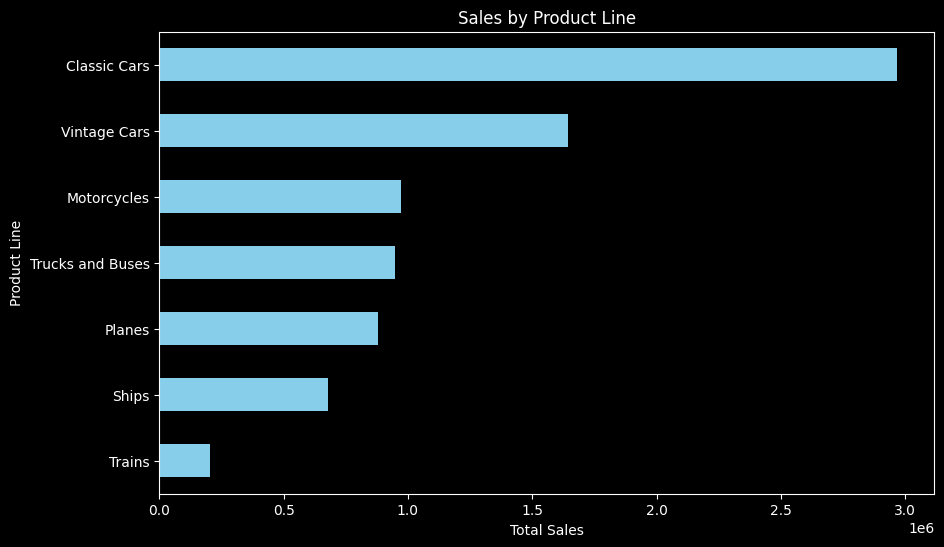

In [ ]:
# Which product lines have the highest and lowest sales?
sales_by_productline = df_cleaned.groupby('PRODUCTLINE')['Sales'].sum().sort_values()

# Plotting sales by product line
plt.figure(figsize=(10, 6))
sales_by_productline.plot(kind='barh', color='skyblue')
plt.title('Sales by Product Line')
plt.xlabel('Total Sales')
plt.ylabel('Product Line')
plt.show()

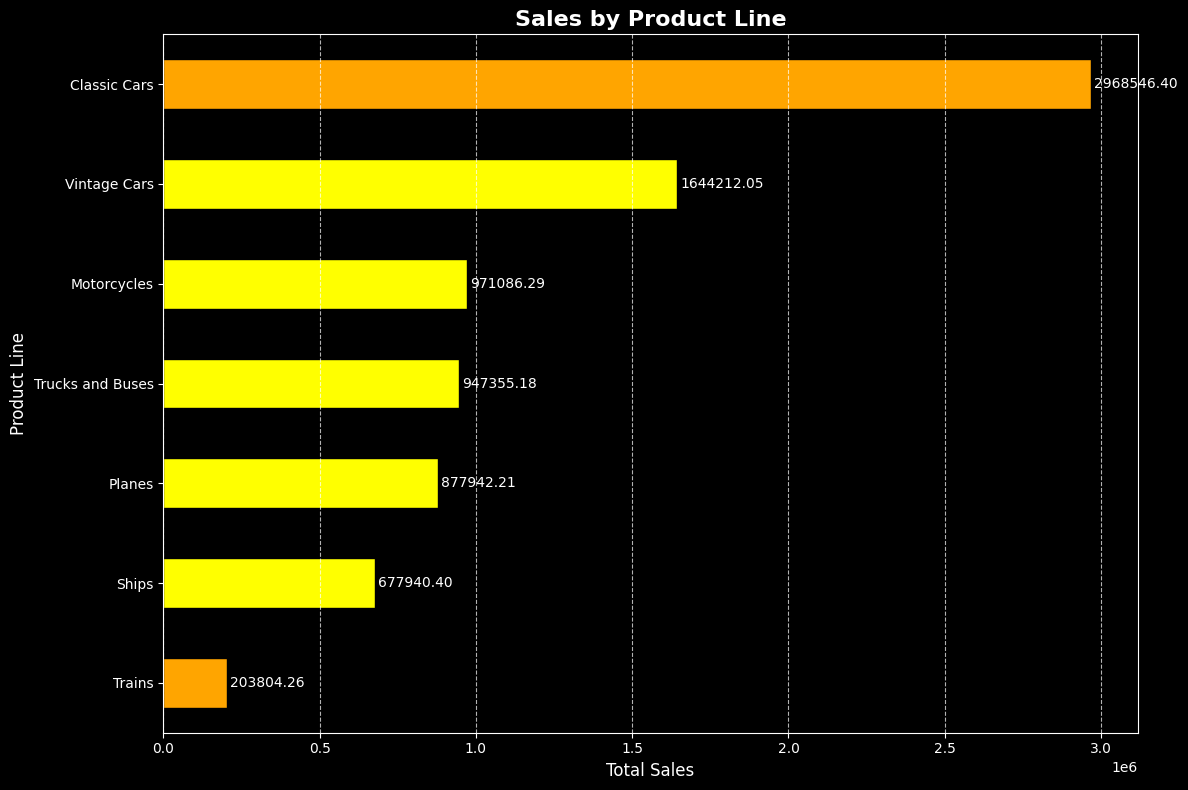

In [ ]:
# prompt: make a bar chart with yellow color then differentiate the highest and lowest product colors with orange, then make the diagram visualization more interesting

# Calculate sales by product line
sales_by_productline = df_cleaned.groupby('PRODUCTLINE')['Sales'].sum().sort_values()

# Set colors for the bars
colors = ['yellow'] * len(sales_by_productline)
colors[0] = 'orange'  # Lowest sales
colors[-1] = 'orange' # Highest sales

# Plotting sales by product line with enhanced visualization
plt.figure(figsize=(12, 8))
bars = sales_by_productline.plot(kind='barh', color=colors, edgecolor='black')
plt.title('Sales by Product Line', fontsize=16, fontweight='bold')
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('Product Line', fontsize=12)

# Add value labels to the bars
for bar in bars.patches:
    width = bar.get_width()
    plt.text(width + 10000, bar.get_y() + bar.get_height()/2,
             '{:.2f}'.format(width), ha='left', va='center')

# Customize grid and background
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().set_facecolor('black')

plt.tight_layout()
plt.show()


## Show sales performance over time, is there any pattern

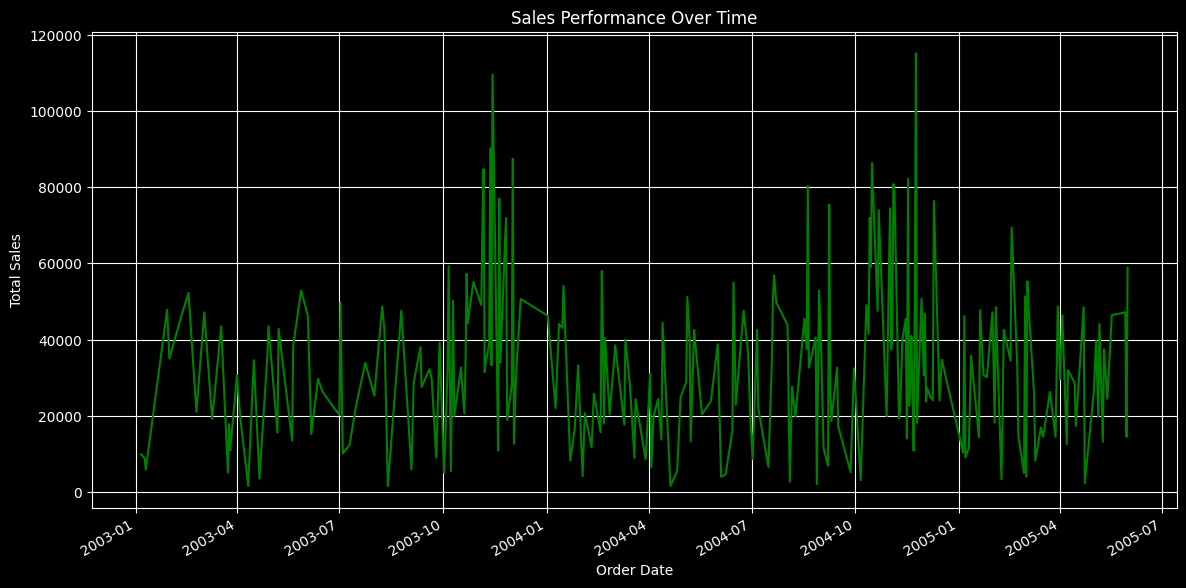

In [ ]:
# Show sales performance over time
sales_over_time = df_cleaned.groupby('ORDERDATE')['Sales'].sum()

# Plotting sales performance over time
plt.figure(figsize=(14, 7))
sales_over_time.plot(color='green')
plt.title('Sales Performance Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

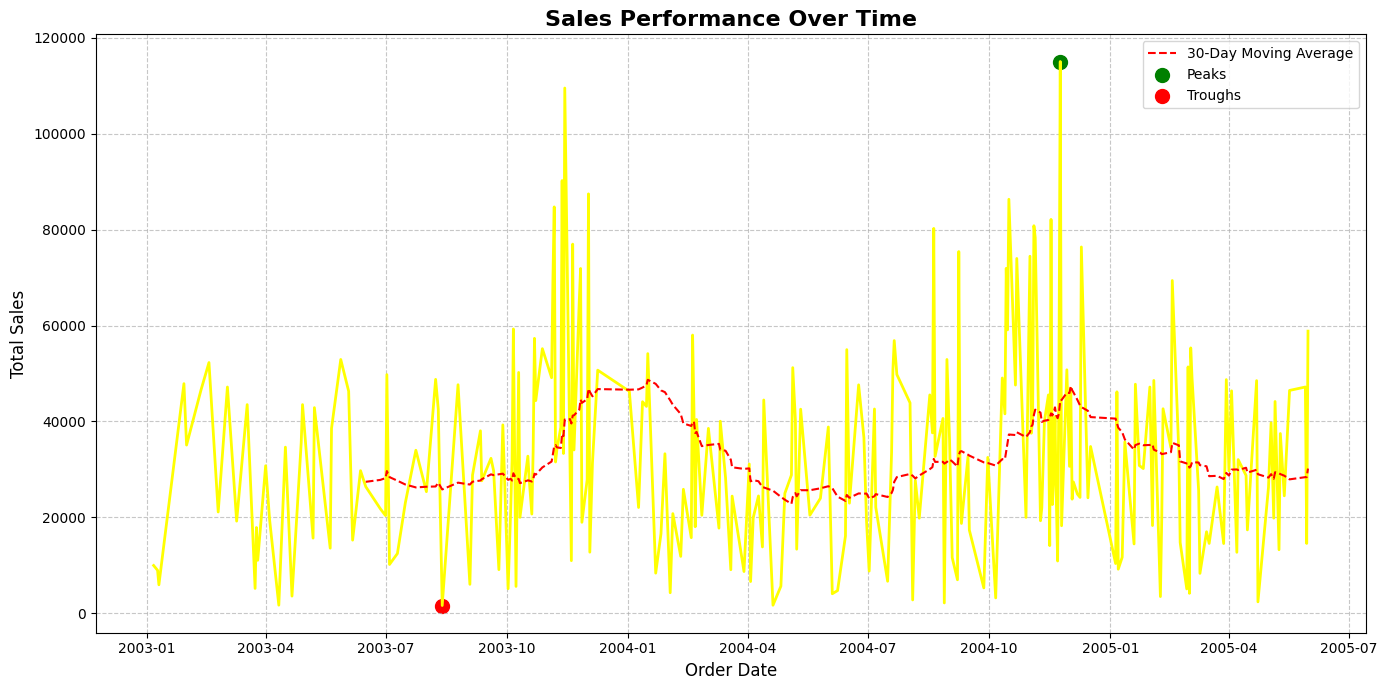

In [ ]:
# prompt: create a line chart with yellow color, then make the diagram visualization more interesting

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandasai import SmartDataframe
from pandasai.llm.openai import OpenAI

# ... (preceding code)

# Plotting sales performance over time with enhancements
plt.figure(figsize=(14, 7))
plt.plot(sales_over_time.index, sales_over_time.values, color='yellow', linewidth=2)
plt.title('Sales Performance Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Order Date', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

# Add a moving average to smooth out the trend
rolling_mean = sales_over_time.rolling(window=30).mean()
plt.plot(rolling_mean.index, rolling_mean.values, color='red', linestyle='--', label='30-Day Moving Average')

# Highlight peak and trough points
peak_dates = sales_over_time[sales_over_time == sales_over_time.max()].index
trough_dates = sales_over_time[sales_over_time == sales_over_time.min()].index
plt.scatter(peak_dates, sales_over_time[peak_dates], color='green', marker='o', s=100, label='Peaks')
plt.scatter(trough_dates, sales_over_time[trough_dates], color='red', marker='o', s=100, label='Troughs')

plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## How does deal size (small, medium, large) correlate with total sales? What is the percentage of contribution for each type of deal?

DEALSIZE
Large      8.910481
Medium    59.845669
Small     31.243850
Name: Sales, dtype: float64


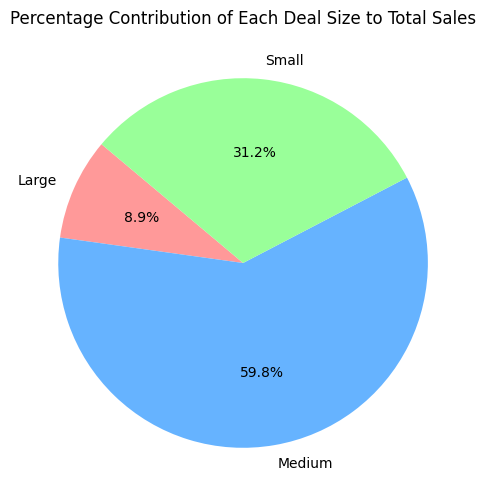

In [ ]:
# Calculate total sales based on deal size
sales_by_dealsize = df_cleaned.groupby('DEALSIZE')['Sales'].sum()

# Calculate the percentage contribution of each deal size
total_sales = sales_by_dealsize.sum()
sales_by_dealsize_percentage = (sales_by_dealsize / total_sales) * 100

# Verify percentage
print(sales_by_dealsize_percentage)

# Plotting deal size contribution
plt.figure(figsize=(10, 6))
sales_by_dealsize_percentage.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Percentage Contribution of Each Deal Size to Total Sales')
plt.ylabel('')
plt.show()

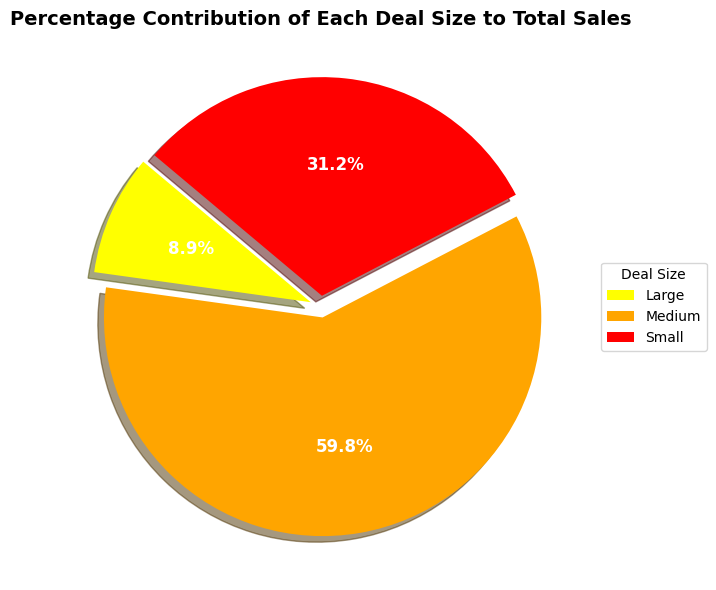

In [ ]:
# prompt: create a pie chart with yellow, orange, red colors then make the diagram visualization more interesting

# Calculate total sales based on deal size
sales_by_dealsize = df_cleaned.groupby('DEALSIZE')['Sales'].sum()

# Calculate the percentage contribution of each deal size
total_sales = sales_by_dealsize.sum()
sales_by_dealsize_percentage = (sales_by_dealsize / total_sales) * 100

# Plotting deal size contribution with enhanced visualization
plt.figure(figsize=(10, 6))
colors = ['yellow', 'orange', 'red']
explode = (0.05, 0.05, 0.05)  # Explode slices for emphasis
wedges, texts, autotexts = plt.pie(sales_by_dealsize_percentage,
                                  autopct='%1.1f%%',
                                  startangle=140,
                                  colors=colors,
                                  explode=explode,
                                  shadow=True,
                                  textprops={'fontsize': 12, 'weight': 'bold'})

plt.title('Percentage Contribution of Each Deal Size to Total Sales', fontsize=14, fontweight='bold')
plt.legend(wedges, sales_by_dealsize_percentage.index, title="Deal Size", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Improve autotext visibility
for autotext in autotexts:
    autotext.set_color('white')

plt.tight_layout()
plt.show()
